In [1]:
%matplotlib inline
import sys
from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../")
    
import numpy as np
from lib.envs.blackjack import BlackjackEnv
from lib.utils.draw import show_value_function,show_policy_black
import matplotlib


env = BlackjackEnv()

In [2]:
def get_epsilon_policy(Q,nA,epsilon):
    
    def policy_fn(observation):
        A = np.ones(nA) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1 - epsilon)
        return A
    return policy_fn

In [3]:
def get_action(policy,state):
    probs = policy(state)
    action = np.random.choice(range(len(probs)), p=probs)
    return action

In [4]:
def TD0_prediction(env,num_episodes,gamma=0.9,alpha =0.1):
    
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    Q_count = defaultdict(lambda: np.zeros(env.action_space.n))
    
    policy = get_epsilon_policy(Q,env.nA,0.1)
    
    for i_episode in range(num_episodes):
        if i_episode % 1000 == 0:
            # \r 实现动态更新
            print(f"\rEpisode :{i_episode}/{num_episodes}",end = "")
            sys.stdout.flush()
        
        state = env.reset()
        action = get_action(policy,state)
        while True:
            
            next_state, reward, done, _ = env.step(action)
            next_action = get_action(policy,next_state)
            
            # key_s = tuple(state)
            # key_n_s = tuple(next_state)
            key_s = state
            key_n_s = next_state
            Q_count[key_s][action] += 1.0
            Q[key_s][action] = Q[key_s][action] + (1 / Q_count[key_s][action]) * ( reward + gamma * Q[key_n_s][next_action] - Q[key_s][action] )
            
            if done:
                break
            
            state, action = next_state, next_action
    return Q,policy

Episode :999000/1000000

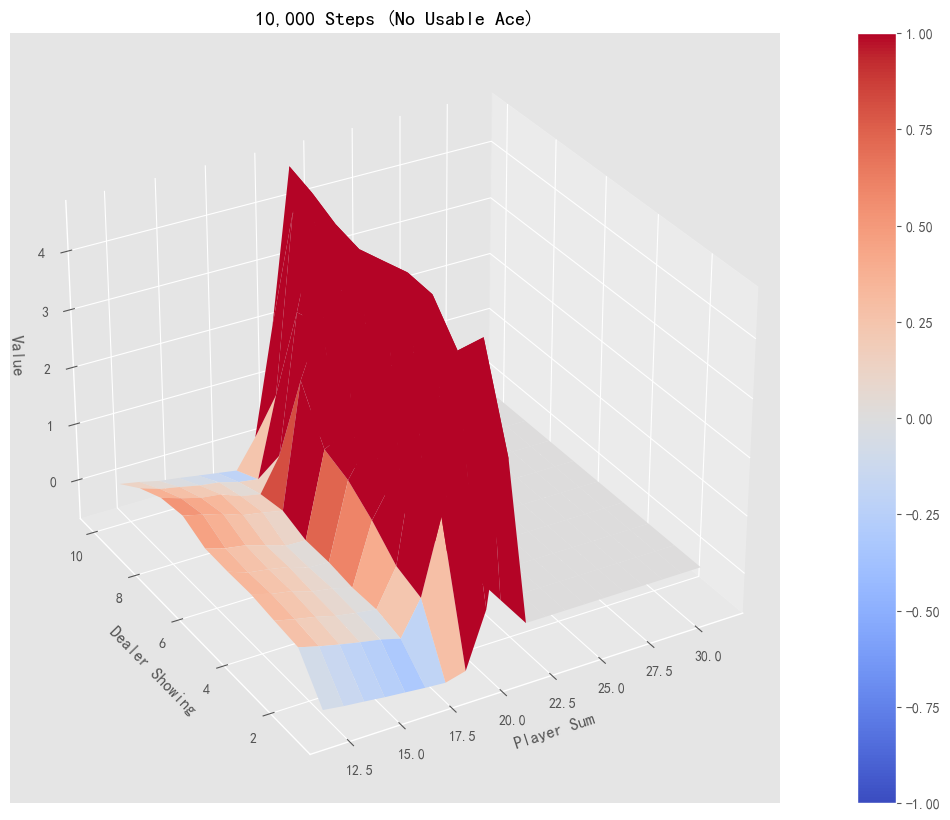

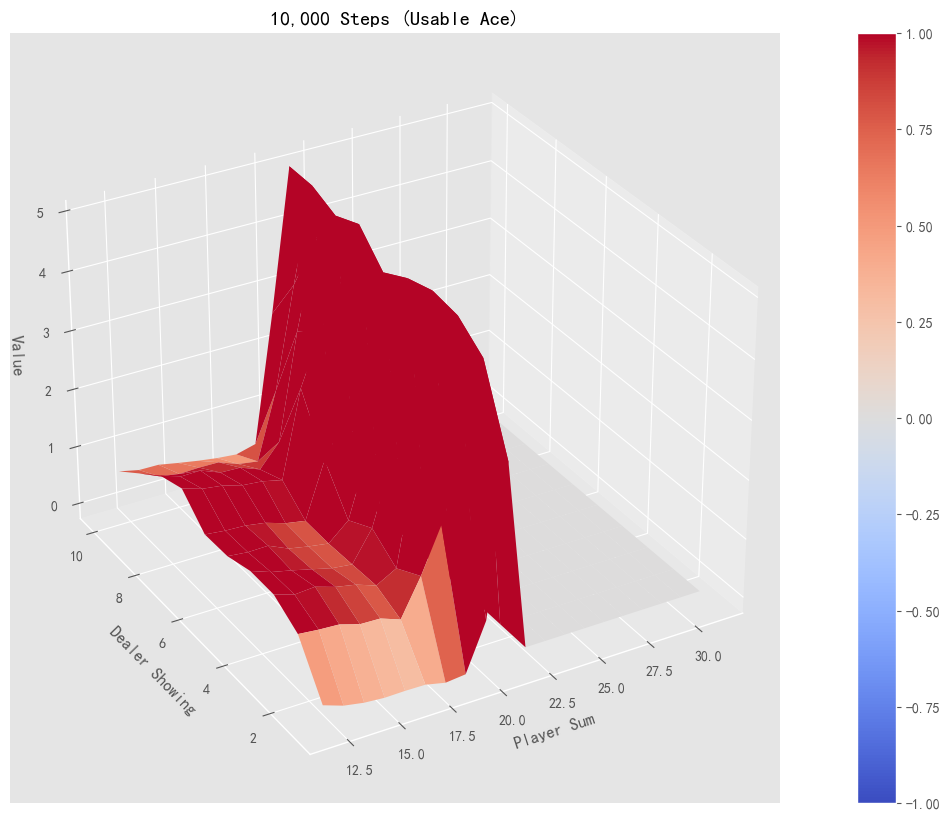

In [5]:
Q,policy = TD0_prediction(env, num_episodes=200000)
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
show_value_function(V, title="10,000 Steps")

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


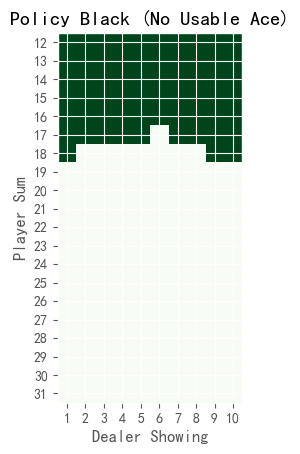

In [6]:

show_policy_black(policy,V)